In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
y = df['Chance of Admit ']
X = df.drop(['Serial No','Chance of Admit '],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=2529)

In [9]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(max_depth=3, random_state=2529)

In [10]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=2529)

In [11]:
dtr.score(X_train,y_train)

0.7738322816632399

In [12]:
from sklearn.model_selection import cross_validate
cross_validate(dtr, X_train, y_train, cv=5)

{'fit_time': array([0.00238013, 0.00263333, 0.00251889, 0.00242662, 0.00234365]),
 'score_time': array([0.00186563, 0.00183654, 0.00156379, 0.00155544, 0.00156546]),
 'test_score': array([0.62738225, 0.74911799, 0.55230282, 0.8131547 , 0.7219827 ])}

In [13]:
dtr.score(X_test,y_test)

0.7533283237506997

In [14]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 2529,
 'splitter': 'best'}

In [15]:
params = {'model__max_depth' : [2,3,4,5,6,7,8, 9, 10],
        'model__criterion' : ['squared_error', 'absolute_error'],
        'model__random_state' : [2529]}

In [16]:
from sklearn.pipeline import Pipeline

In [18]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params,cv=5)

In [19]:
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [20]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [21]:
grid.best_params_

{'model__criterion': 'squared_error',
 'model__max_depth': 3,
 'model__random_state': 2529}

In [22]:
best = grid.best_estimator_

In [23]:
best.fit(X_train,y_train)

Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=3, random_state=2529))])

In [24]:
y_pred=best.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [26]:
mean_absolute_error(y_test,y_pred)

np.float64(0.057160452637289014)

In [27]:
mean_absolute_percentage_error(y_test,y_pred)

np.float64(0.09720961265635472)

In [28]:
r2_score(y_test,y_pred)

0.7533283237506997

[Text(0.5, 0.875, 'CGPA <= 8.93\nsquared_error = 0.019\nsamples = 320\nvalue = 0.731'),
 Text(0.25, 0.625, 'CGPA <= 8.035\nsquared_error = 0.012\nsamples = 217\nvalue = 0.663'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'GRE Score <= 305.5\nsquared_error = 0.01\nsamples = 55\nvalue = 0.548'),
 Text(0.0625, 0.125, 'squared_error = 0.009\nsamples = 36\nvalue = 0.514'),
 Text(0.1875, 0.125, 'squared_error = 0.006\nsamples = 19\nvalue = 0.611'),
 Text(0.375, 0.375, 'CGPA <= 8.63\nsquared_error = 0.006\nsamples = 162\nvalue = 0.702'),
 Text(0.3125, 0.125, 'squared_error = 0.006\nsamples = 103\nvalue = 0.676'),
 Text(0.4375, 0.125, 'squared_error = 0.004\nsamples = 59\nvalue = 0.748'),
 Text(0.75, 0.625, 'CGPA <= 9.225\nsquared_error = 0.005\nsamples = 103\nvalue = 0.876'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'GRE Score <= 318.5\nsquared_error = 0.003\nsamples = 53\nvalue = 0.827'),
 Text(0.5625, 0.125, 'squared_error = 0.003\nsamples = 8\nvalue = 0.774'),
 Text(0.6875

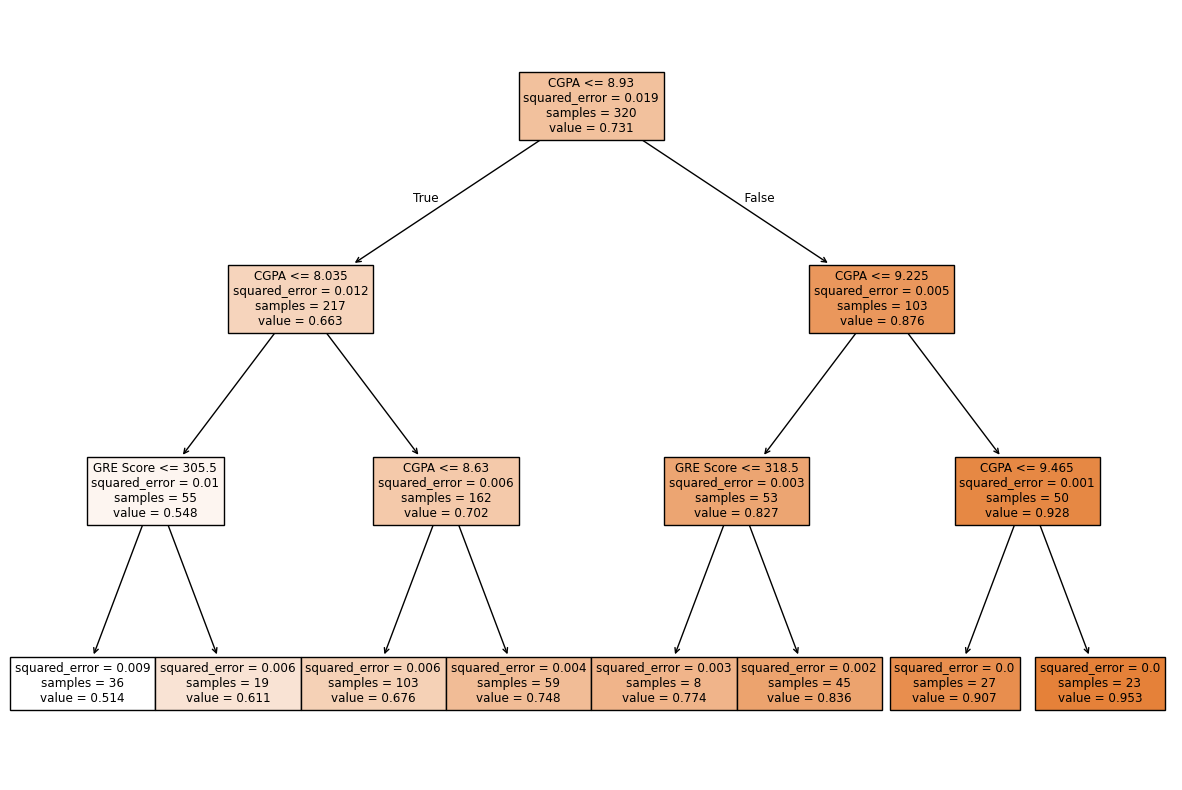

In [29]:
fig,ax = plt.subplots(figsize=(15,10))
final=DecisionTreeRegressor(max_depth=3, random_state=2529)
final.fit(X_train,y_train)
plot_tree(final,feature_names=X.columns,filled=True)